In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
#np.unique(y)

In [2]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

下面展示的是感知机的学习

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(n_iter=60,eta0=0.05,random_state=0)
ppn.fit(X_train_std,y_train)

y_pred = ppn.predict(X_test_std)

print('Misclassfied samples: %.2f' % accuracy_score(y_test,y_pred))

Misclassfied samples: 0.98


In [5]:
from  matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    marker = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #how many colors needed
    
    
    # plot the decision region
    
    x1_min,x1_max = X[:,0].min() -1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min() -1,X[:,0].max()+1
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    X_test,y_test = X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y == cl,1],
                   alpha=0.8,c=cmap(idx),
                    marker=marker[idx],label=cl
                   )

    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidth=1,marker='o',
                   s=55,label='test set')
        

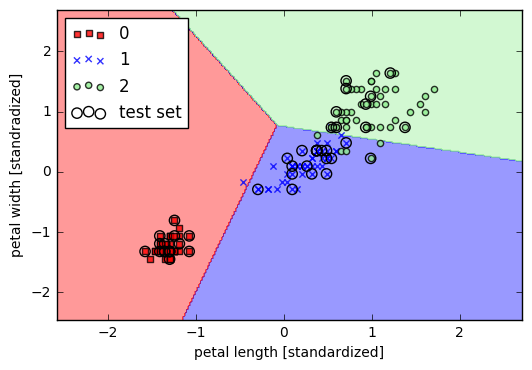

In [6]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150)
                     )
                           
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standradized]')
plt.legend(loc='upper left')
plt.show()

**接下来使用logistic回归 LR**

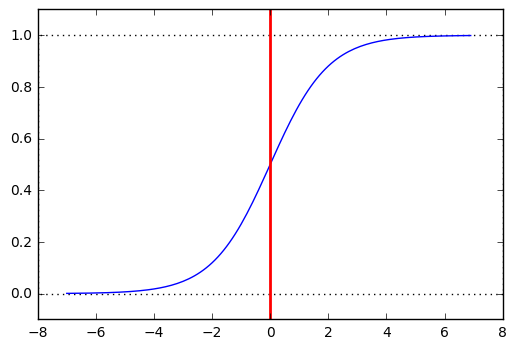

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-7,7,0.1)
y = 1.0/(1.0+np.exp(-x))
plt.plot(x,y)
#plt.axvline(x = 2.0, ymin = 0.2,ymax=0.6,color='r')
plt.axvline(x = 0.0,color='r',linewidth=2)
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.ylim(-0.1,1.1)
plt.show()

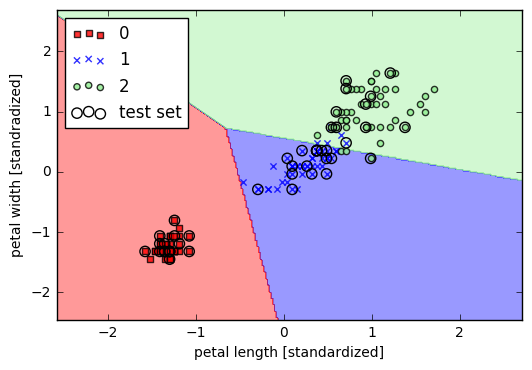

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standradized]')
plt.legend(loc='upper left')
plt.show()

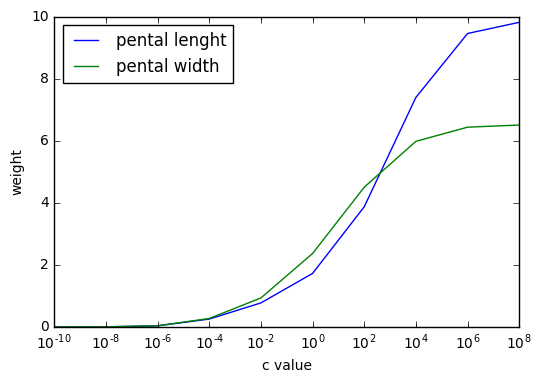

In [9]:
weights = []
xc = []
for c in np.arange(-5,5,1):
    lr = LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    xc.append(100**c)
    weights.append(lr.coef_[2])
    
weights = np.array(weights)
plt.xlabel('c value')
plt.ylabel('weight')
plt.plot(xc,weights[:,0],label='pental lenght')
plt.plot(xc,weights[:,1],label='pental width')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

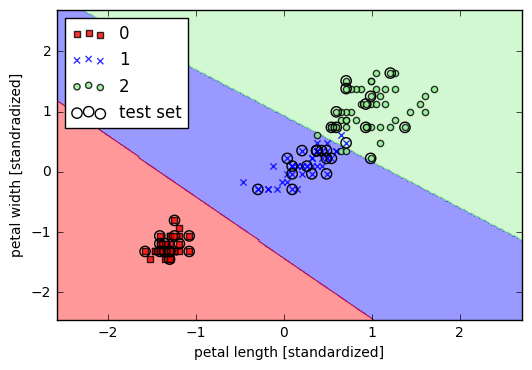

In [10]:
from sklearn.svm import SVC
lr = SVC(kernel='linear')
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standradized]')
plt.legend(loc='upper left')
plt.show()